In [68]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit.cost import LeastSquares
import matplotlib.ticker as ticker



data = np.loadtxt("Am241_def_50mm2.txt")
V_bias = [10.30, 14.43, 18.26, 22.88, 28.54, 33.07, 38.06, 43.72, 49.21, 54.71, 59.77 ,64.30, 70.00]
fwhm = data[:,3]
err_fwhm = data[:,4]*15
ch = data[:,1]
err_ch = data[:,2]
fwhm_ch = data[:,5]*10**3
err_fwhmch=data[:,6]*10**3*15

err_vbias = []

for i in range(len(V_bias)):
    err_vbias.append(0.5/100*V_bias[i])

I_buio = []
err_vbias=[]
err_vbuio=[]
err_Ibuio=[]

for i in range(len(V_bias)):
    
    err_vbias.append(0.5/100* V_bias[i])
    
    

#print(V_bias[:13])    
#print(fwhm[2:6])
#print(sum(fwhm[2:6])/len(fwhm[2:6]))

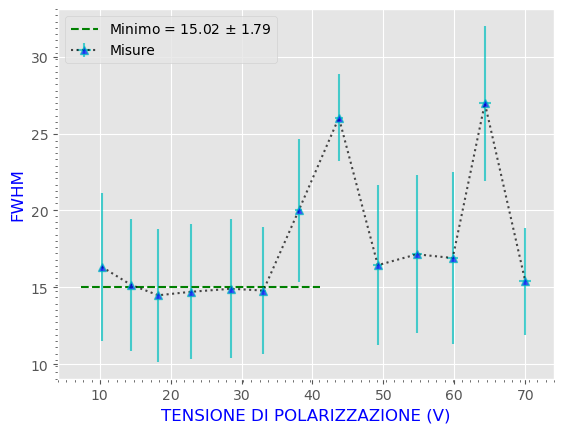

In [94]:

fig, ax = plt.subplots()

plt.errorbar(V_bias, fwhm, xerr= list(map(lambda x: x*2.5, err_vbias)), yerr= err_fwhm, linestyle=":", marker="^", color="k", mec="c", mfc="b", ecolor="c", label="Misure", alpha=.7)
plt.grid("on")
plt.xlabel("TENSIONE DI POLARIZZAZIONE (V)", color="b")
plt.ylabel("FWHM", color="b")


pesi = list(map(lambda x: 1/x**2, err_fwhm))
plateau = 0
#m = 6 #da che misura calcolo plateau

for i in range(len(ch[0:6])):
    plateau = plateau + fwhm[i]*pesi[i]

plateau = plateau/sum(pesi[0:6])
err_plateau = 1/np.sqrt(sum(pesi[0:6]))

plt.hlines(plateau, V_bias[0]-3, V_bias[6]+3, linestyle="--", color="g", label=f"Minimo = {round(plateau,2)} $\\pm$ {round(err_plateau,2)}")


plt.legend(loc = "upper left")
plt.style.use("ggplot")

#plt.xlim(10, 80)
# For the x-axis
ax.xaxis.set_minor_locator(ticker.LinearLocator(60))
#ax.xaxis.set_major_locator(ticker.LinearLocator(8))
# For the y-axis
ax.yaxis.set_minor_locator(ticker.LinearLocator(60))
#ax.yaxis.set_major_locator(ticker.LinearLocator(8))

plt.show()




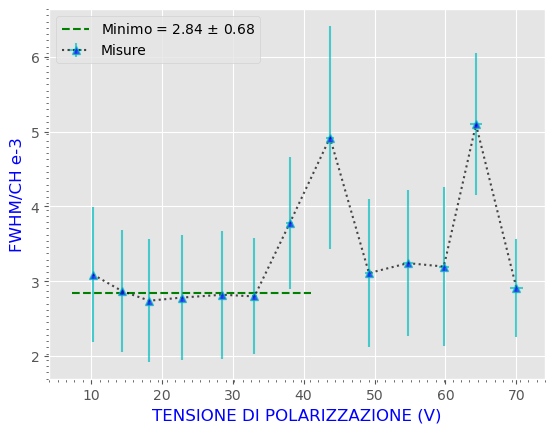

In [86]:

fig, ax = plt.subplots()

plt.errorbar(V_bias, fwhm_ch, xerr= list(map(lambda x: x*2.5, err_vbias)), yerr= err_fwhmch, linestyle=":", marker="^", color="k", mec="c", mfc="b", ecolor="c", label="Misure", alpha=.7)
plt.grid("on")
plt.xlabel("TENSIONE DI POLARIZZAZIONE (V)", color="b")
plt.ylabel("FWHM/CH e-3", color="b")


pesi = list(map(lambda x: 1/x**2, err_fwhmch))
plateau = 0
#m = 6 #da che misura calcolo plateau

for i in range(len(ch[0:6])):
    plateau = plateau + fwhm_ch[i]*pesi[i]

plateau = plateau/sum(pesi[0:6])
err_plateau = np.sqrt(1/(sum(pesi[0:6])))

plt.hlines(plateau, V_bias[0]-3, V_bias[6]+3, linestyle="--", color="g", label=f"Minimo = {round(plateau,2)} $\\pm$ {round(err_plateau*2,2)}")


plt.legend(loc = "upper left")
plt.style.use("ggplot")

#plt.xlim(10, 80)
# For the x-axis
ax.xaxis.set_minor_locator(ticker.LinearLocator(60))
#ax.xaxis.set_major_locator(ticker.LinearLocator(8))
# For the y-axis
ax.yaxis.set_minor_locator(ticker.LinearLocator(60))
#ax.yaxis.set_major_locator(ticker.LinearLocator(8))

plt.show()




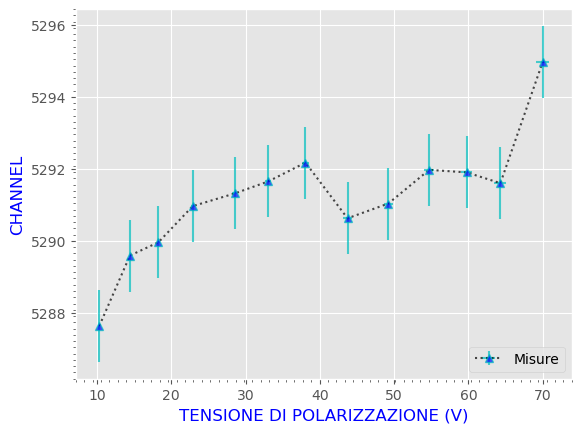

In [92]:
#Vbias vs channel
fig, ax = plt.subplots()

plt.errorbar(V_bias, ch, xerr=list(map(lambda x: x*2.5, err_vbias)), yerr=list(map(lambda x: x, err_ch)), linestyle=":", marker = "^", color="k", mec="c", mfc="b", ecolor="c", label="Misure", alpha=.7)
plt.grid("on")
plt.style.use("ggplot")
plt.xlabel("TENSIONE DI POLARIZZAZIONE (V)", color="b")
plt.ylabel("CHANNEL", color="b")


pesi = list(map(lambda x: 1/x**2, err_ch))
plateau = 0
for i in range(len(ch[10:])):
    plateau = plateau + ch[i+10]*pesi[i+10]

plateau = plateau/sum(pesi[10:])
err_plateau = 1/np.sqrt(sum(pesi[10:]))

#plt.hlines(plateau, V_bias[0], V_bias[-1], linestyle="--", color="g", label=f"Plateau = {round(plateau,2)} +/- {round(err_plateau,2)}")

#plt.xlim(10, 80)
#plt.ylim(round(ch[0], 1), round(ch[-1],1))
# For the x-axis
ax.xaxis.set_minor_locator(ticker.LinearLocator(60))
# For the y-axis
ax.yaxis.set_minor_locator(ticker.LinearLocator(60))

plt.legend(loc = "lower right")
plt.show()


In [2]:
"""#FIT V bias VS I buio con f(x) = a $x^b$ + c $x^d$

func2=lambda x, Is, Vt: Is*(np.e**(-x/Vt)-1) 

err=[]
for i in range(len(V_bias)):
    err.append(2.5*I_buio[i]*np.sqrt((err_Ibuio[i]/I_buio[i])**2+(err_vbias[i]/V_bias[i])**2))


least_squares = LeastSquares (V_bias, I_buio, err, func2)
my_minuit = Minuit (least_squares, Is=0, Vt=0) 
my_minuit.migrad ()  
my_minuit.hesse ()
#display(my_minuit)
x2 = np.linspace(10, 80, 100)

fig, ax = plt.subplots()

plt.errorbar(V_bias, I_buio, xerr=list(map(lambda x: x*2.5, err_vbias)), yerr=list(map(lambda x: x*2.5, err_Ibuio)), linestyle="None", marker = "^", color="k", mec="c", mfc="b", ecolor="c", label="Misure", alpha=.7)
plt.plot(x2, func2(x2, my_minuit.values[0], my_minuit.values[1] ), linestyle="--", color="g", label="Fit con esponenziale")
plt.grid("on")
plt.xlabel("TENSIONE DI POLARIZZAZIONE (V)", color="b")
plt.ylabel("CORRENTE DI BUIO (uA)", color="b")

fit_info = [
    f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {my_minuit.fmin.reduced_chi2:.1f}",
]
for p, v, e in zip(my_minuit.parameters, my_minuit.values, my_minuit.errors):
    fit_info.append(f"{p} = ${v:.5f} \\pm {e:.5f}$")

plt.legend(title="\n".join(fit_info), frameon=True)

plt.style.use("ggplot")

plt.xlim(10, 80)
plt.ylim(0.1, 0.26)
# For the x-axis
ax.xaxis.set_minor_locator(ticker.LinearLocator(60))
#ax.xaxis.set_major_locator(ticker.LinearLocator(8))
# For the y-axis
ax.yaxis.set_minor_locator(ticker.LinearLocator(60))
#ax.yaxis.set_major_locator(ticker.LinearLocator(8))

plt.show()"""

'#FIT V bias VS I buio con f(x) = a $x^b$ + c $x^d$\n\nfunc2=lambda x, Is, Vt: Is*(np.e**(-x/Vt)-1) \n\nerr=[]\nfor i in range(len(V_bias)):\n    err.append(2.5*I_buio[i]*np.sqrt((err_Ibuio[i]/I_buio[i])**2+(err_vbias[i]/V_bias[i])**2))\n\n\nleast_squares = LeastSquares (V_bias, I_buio, err, func2)\nmy_minuit = Minuit (least_squares, Is=0, Vt=0) \nmy_minuit.migrad ()  \nmy_minuit.hesse ()\n#display(my_minuit)\nx2 = np.linspace(10, 80, 100)\n\nfig, ax = plt.subplots()\n\nplt.errorbar(V_bias, I_buio, xerr=list(map(lambda x: x*2.5, err_vbias)), yerr=list(map(lambda x: x*2.5, err_Ibuio)), linestyle="None", marker = "^", color="k", mec="c", mfc="b", ecolor="c", label="Misure", alpha=.7)\nplt.plot(x2, func2(x2, my_minuit.values[0], my_minuit.values[1] ), linestyle="--", color="g", label="Fit con esponenziale")\nplt.grid("on")\nplt.xlabel("TENSIONE DI POLARIZZAZIONE (V)", color="b")\nplt.ylabel("CORRENTE DI BUIO (uA)", color="b")\n\nfit_info = [\n    f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {my_minu